# Linear Regression

Linear regression is one of the most fundamental techniques in machine learning and statistics. It provides a simple yet powerful method for understanding relationships between variables and making predictions. In this assignment, we will explore three different approaches to linear regression:

 - Least Squares: A method that minimizes the sum of squared residuals.

 - RANSAC (Random Sample Consensus): A robust estimation technique that mitigates the effect of outliers.

 - Least Squares as Likelihood Maximization: A probabilistic interpretation of least squares regression based on the assumption of normally distributed errors.

By applying these methods to the Boston Housing dataset, students will develop a deeper understanding of regression models and their practical applications.

To truly understand the algorithm, **please avoid separating the parameters of W and calculating them individually**. Instead, you should make use of matrix multiplication as much as possible to keep the calculations efficient and aligned with the method's principles. This will also help you better grasp the underlying mechanics of the algorithm.

Hint: 
 - Don't worry if your fitted line doesn't perfectly match the data points. As long as it generally follows the overall trend of the data and you have verified that your formula is correct, you're on the right track.
 - Be careful not to confuse Mean Squared Error (MSE) with the distance from a point to a line. Make sure you understand when to use each metric appropriately.

## Data Loading and Visualisation

### Dataset Description

The Boston Housing dataset contains information about housing prices in the Boston metropolitan area. It consists of 506 samples and 13 features, including variables such as crime rate, average number of rooms per dwelling, and distance to employment centers. The goal is to predict the median house price based on these features.

The dataset is commonly used to benchmark regression models and analyze feature importance in real-world applications. For this assignment, you will use different regression techniques to fit the data and compare their performance.

In [1]:
# Data Loading

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define column names for the dataset
names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'GE', 'DIS', 'RAD', 'TAX', 'PRTATIO', 'B', 'LSTAT', 'PRICE']

# Specify the path to the dataset
data_path = 'boston.csv'

boston=pd.read_csv(data_path, names=names)

# Extract feature variables
x_data = boston[names[:-1]]
x_data = x_data.to_numpy()[1:].astype(float)

# Extract target variable (house price)
y_data = boston['PRICE']
y_data = y_data.to_numpy()[1:].astype(float)
print(x_data.shape, y_data.shape)

(506, 13) (506,)


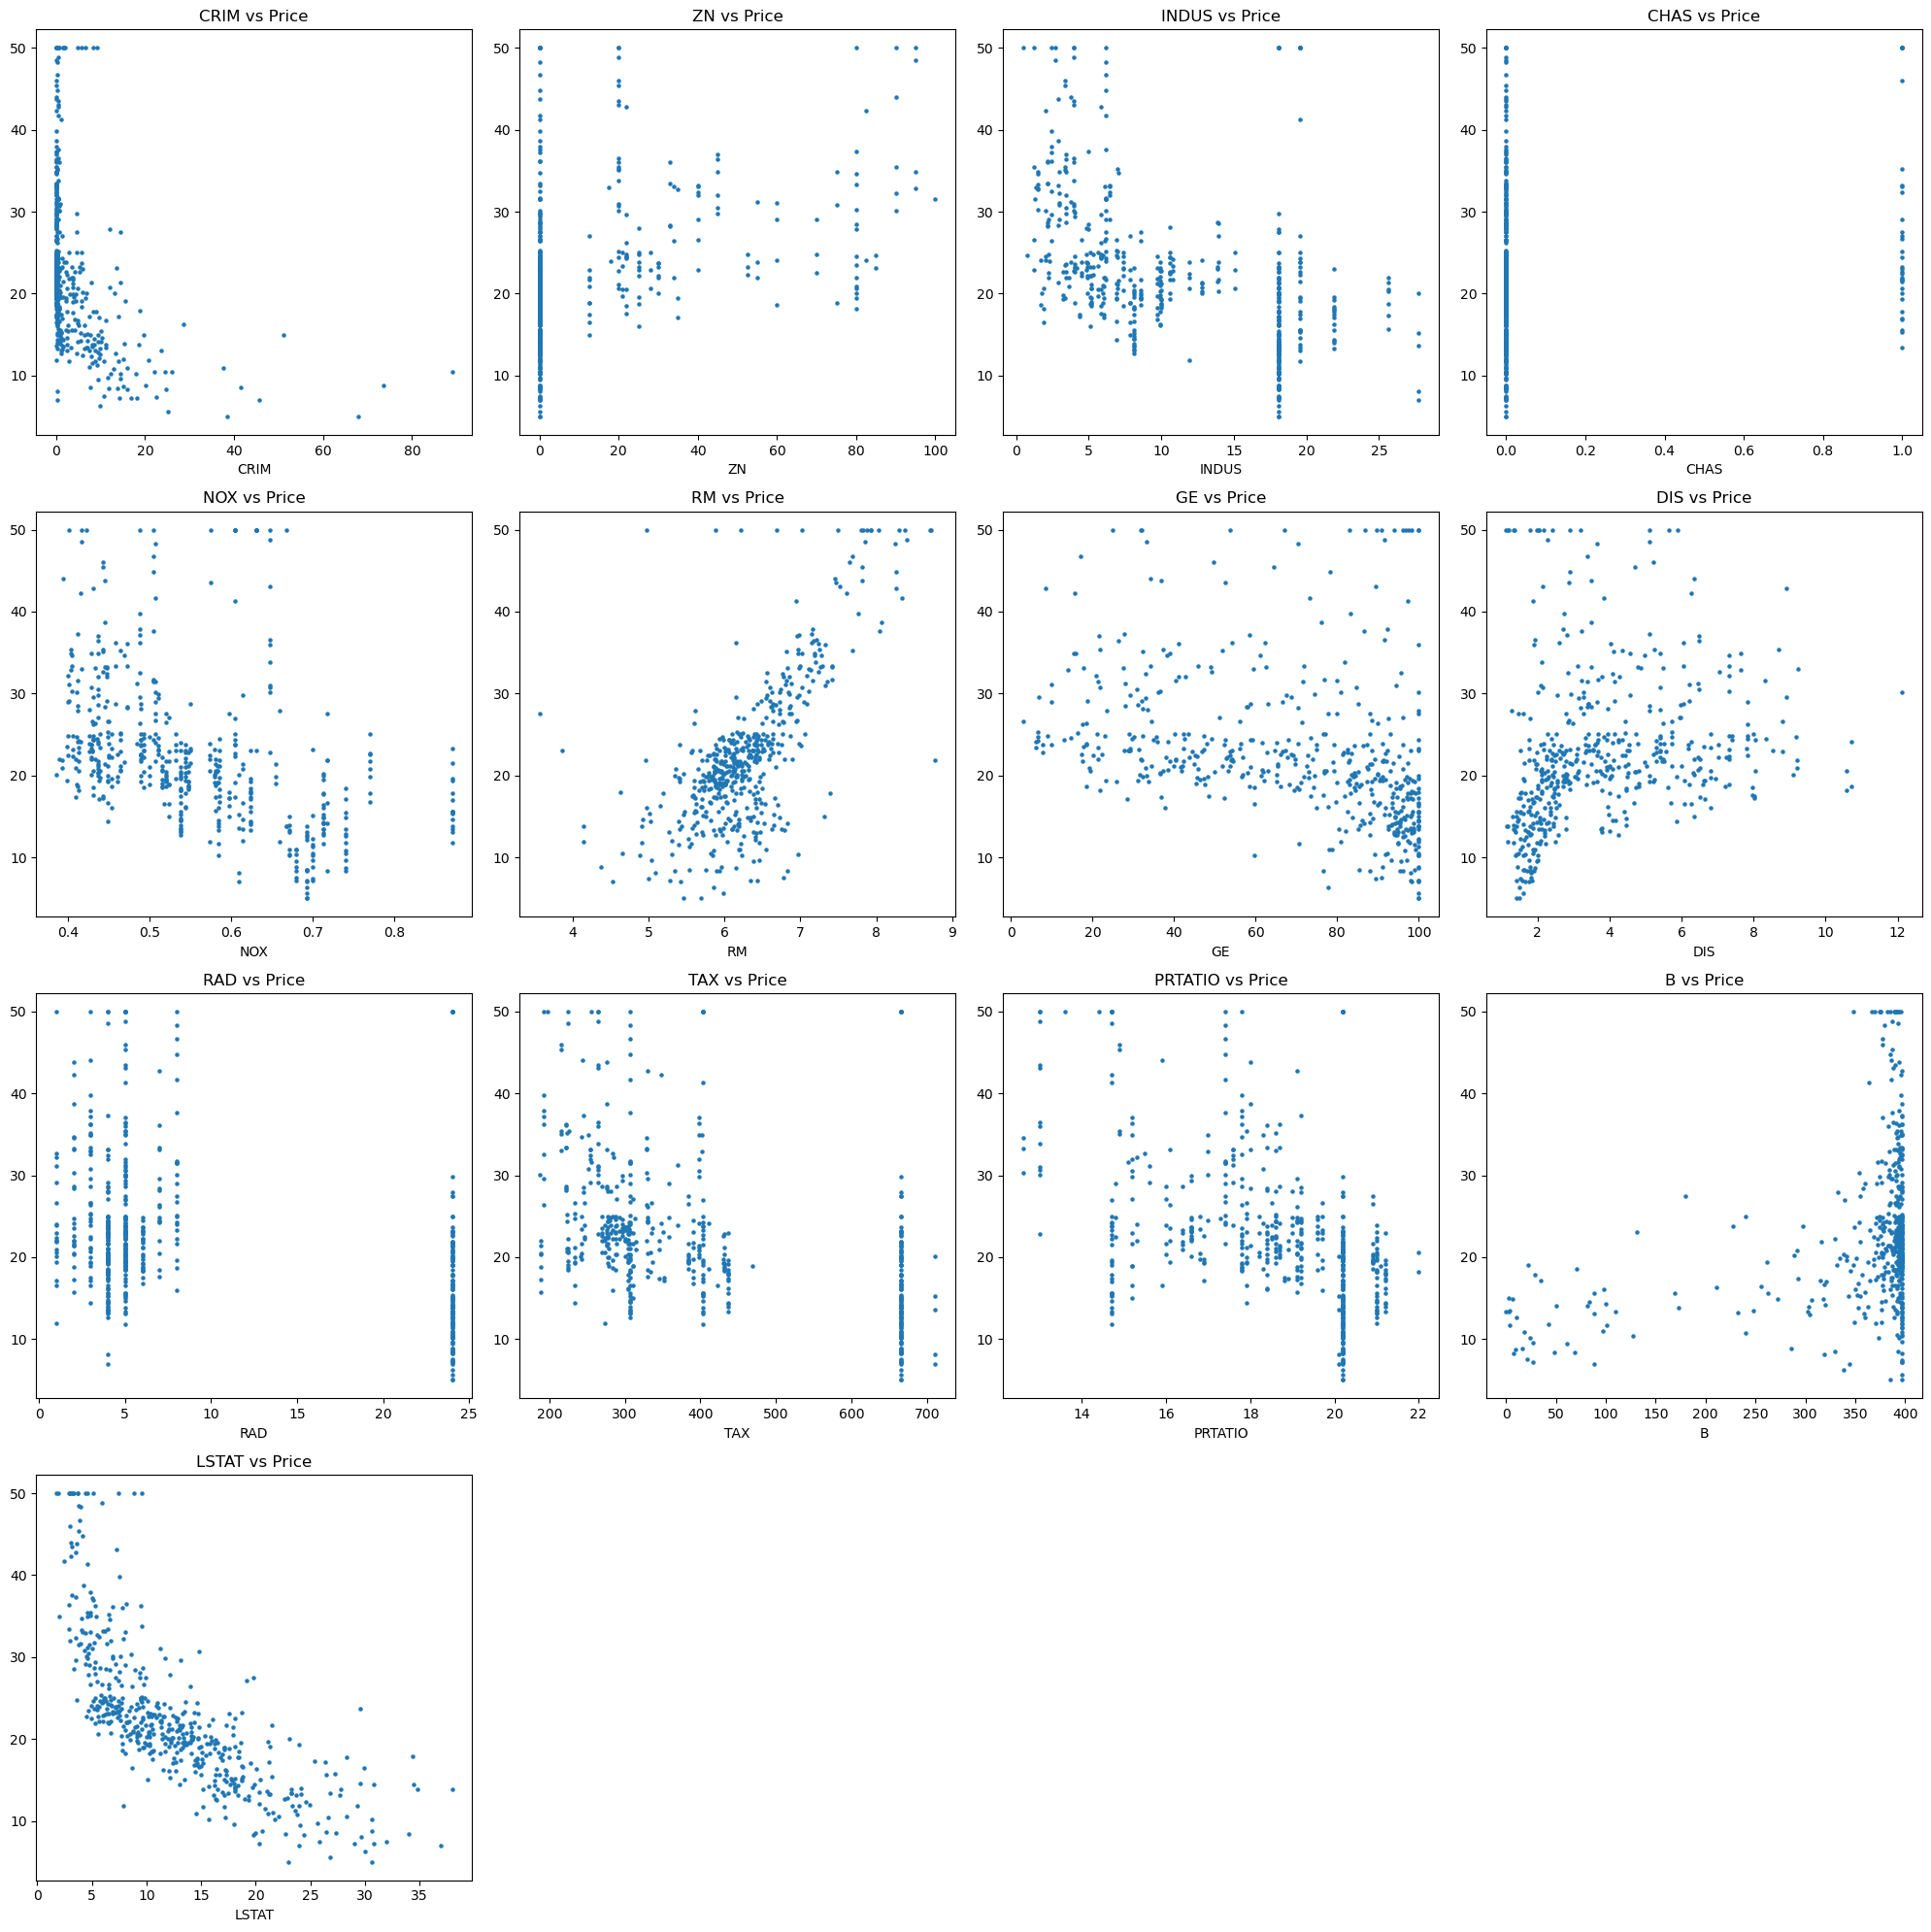

In [2]:
# Data visualization: Display the relationship between each feature and house price.
# Each point represents a sample.

plt.figure(figsize=(20, 20))
for i, col in enumerate(names[:-1]):
    plt.subplot(4, 4, i + 1)
    plt.scatter(x_data[:, i], y_data, s=5)
    plt.xlabel(col)
    plt.title(f'{col} vs Price')

plt.tight_layout()
plt.show()

## Least Square Method

In this assignment, students will explore the relationship between the number of rooms in a house and its price using the **least squares method**. The "RM" attribute in the Boston Housing Dataset represents the average number of rooms per dwelling, which is known to be a significant factor in determining house prices.

To complete this task, students must manually implement the least squares method to fit a simple linear regression model. **Directly using built-in functions or libraries that solve for the least squares solution is strictly prohibited and will result in a score of zero**!

**Please avoid separating the parameters of W and calculating them individually!**

Hint: $X^TX$ is invertible.

(506, 2)
[-34.67062078   9.10210898]


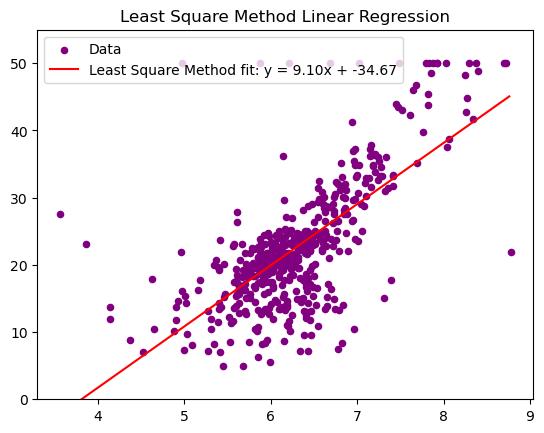

In [27]:

y = y_data
X = x_data[:, 5]
X = np.vstack([np.ones(len(X)), X]).T
W = np.zeros((X.shape[-1], 1))
print(X.shape)

def compute_MSE(X, y, W):
    """
    Compute Mean Squared Error (MSE) for the linear regression model.

    Parameters:
    X: A numpy array of shape (N, 2) containing feature matrix (with bias term)
    y: A numpy array of shape (N, 1) containing target variable (house price)
    W: A numpy array of shape (2,) containing model parameters (weights)

    Returns:
    float: Mean Squared Error (MSE)
    """
    
    mse = -1

    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    y_pred= X @ W
    mse = np.mean((y - y_pred) ** 2)

    pass

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return mse

def compute_model(X, y):
    """
    Fit a linear regression model using the Least Squares Method.

    Parameters:
    X: A numpy array of shape (N, 2) containing feature matrix (with bias term)
    y: A numpy array of shape (N, 1) containing Target variable (house price)

    Returns:
    W: A numpy array of shape (2,) containing estimated model parameters (weights)
    """
    W = np.zeros((X.shape[-1], 1))

    # Hint: You should use X and y to compute W through matrix multiplication and other operations.
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    pass
    W= np.linalg.inv(X.T @ X) @ X.T @ y 
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    return W

# Run the least squares method to compute model parameters
W = compute_model(X, y)
print(W)

# Generate prediction values for visualization
line_X = np.arange(X[:, 1].min(), X[:, 1].max(), 0.1)
line_y = W @ np.vstack([np.ones(len(line_X)), line_X])

# Visualization of the linear regression fit
plt.scatter(X[:, 1], y, s=20, label="Data", color='purple')     # Plot data points
plt.plot(line_X, line_y, label=f"Least Square Method fit: y = {W[1]:.2f}x + {W[0]:.2f}", color='red')
plt.legend()
plt.ylim(y.min()-5, y.max()+5)
plt.title("Least Square Method Linear Regression")
plt.show()

In [28]:
# Compute the mean absolute difference between computed and stored weights
# If the implementation is correct, the difference should be close to zero

np.savez('check.npz', lstsq=W)

# Compute the Mean Squared Error (MSE) of your fitted model
mse = compute_MSE(X, y, W)
print('MSE =', mse)

# Load the stored weights and compute the difference
data = np.load('check.npz')
W_check = data['lstsq']
difference = np.abs(W - W_check).mean()
print('difference: %f' % difference)

MSE = 43.60055177116957
difference: 0.000000


## RANSAC

In this task, we focus on addressing the challenges posed by outliers in linear regression models. While Least Squares Regression is a popular method for fitting a line to data, it is highly sensitive to outliers, which can significantly affect the accuracy of the predictions. The purpose of this task is to introduce you to the RANSAC (Random Sample Consensus) algorithm, a robust approach that minimizes the influence of outliers by iteratively selecting subsets of the data and identifying the best-fitting model based on a threshold of inliers. Through this task, you will learn how to improve the reliability of regression models and make them more robust to data imperfections.

(506, 2)


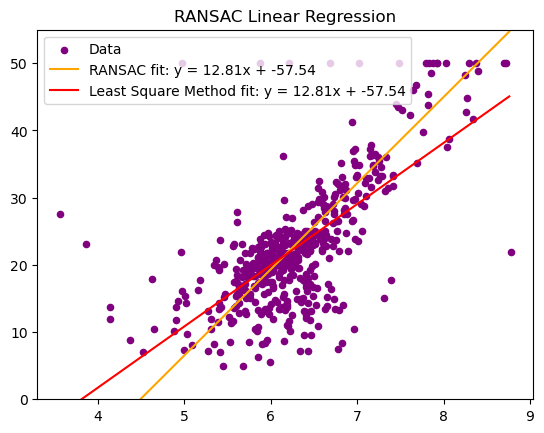

The number of inliers detected by RANSAC is: 127


In [ ]:
y = y_data
X = x_data[:, 5]
X = np.vstack([np.ones(len(X)), X]).T
W = np.zeros((X.shape[-1], 1))
print(X.shape)

def get_distance(X, y, W):
    """
    Compute the perpendicular distance of each point to the fitted line.
    """
    distances = np.zeros((X.shape[0], 1))

    # Hint: You need to compute the perpendicular distance from each point to the fitted line,
    # rather than using the residual from the previous step.
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    a=W[1]
    b=-1
    c=W[0]
    distances=np.abs(a * X[:, 1] + b * y + c) / np.sqrt(a ** 2 + b ** 2)
    return distances.reshape(-1, 1)
    pass

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return distances

def ransac(X, y, n_iterations=1000, threshold=0.1, num_samples=20):
    """
    Perform RANSAC (Random Sample Consensus) to robustly fit a linear model.

    Args:
        X (numpy.ndarray): Feature matrix.
        y (numpy.ndarray): Target values.
        n_iterations (int): Number of iterations for RANSAC.
        threshold (float): Distance threshold to determine inliers.
        num_samples (int): Number of samples to fit the model.

    Returns:
        best_model (numpy.ndarray): Best-fitting model weights.
        best_inliers (int) : Number of samples that are inliers.
    """

    best_model = None
    best_inliers = np.zeros((1))

    for _ in range(n_iterations):

        # Hint: First, randomly select num_samples data points and fit a Least Squares model using them.
        # Then, count how many points have a distance to the fitted line smaller than the threshold
        # (Number of samples that are inliers).
        # Finally, choose the model weights that result in the maximum number of inliers as the final prediction.
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # Randomly select num_samples data points
        indices = np.random.choice(X.shape[0], num_samples, replace=False)
        X_sample = X[indices]
        y_sample = y[indices]
        W= compute_model(X_sample, y_sample)
        # Compute distances for all points
        distances = get_distance(X, y, W)
        # Count inliers
        inliers= np.sum(distances<threshold)
        # Update best model if current inliers are greater than previous best
        if inliers > best_inliers.sum():
            best_inliers = distances < threshold
            best_model = W
        
        pass
    

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return best_model, best_inliers

threshold = 0.1

# Run RANSAC algorithm to obtain the best-fitting model and inliers
model_weight, best_inliers = ransac(X, y, threshold=threshold)
W = model_weight

# Generate predictions for visualization
line_X2 = np.arange(X[:, 1].min(), X[:, 1].max(), 0.1)
line_y2 = W @ np.vstack([np.ones(len(line_X2)), line_X2])

# Visualisation
plt.scatter(X[:, 1], y, s=20, label="Data", color='purple')         # Original data points
plt.plot(line_X2, line_y2, label=f"RANSAC fit: y = {W[1]:.2f}x + {W[0]:.2f}", color='orange')
plt.plot(line_X, line_y, label=f"Least Square Method fit: y = {W[1]:.2f}x + {W[0]:.2f}", color='red')
plt.legend()
plt.ylim(y.min()-5, y.max()+5)
plt.title("RANSAC Linear Regression")
plt.show()

# Print the number of inliers detected by RANSAC
print('The number of inliers detected by RANSAC is:', best_inliers.sum())

## Least Squares as Likelihood Maximization

Least Squares can be interpreted under a probabilistic framework. If we assume that observation noise follows an i.i.d. Gaussian distribution with zero mean and constant variance, maximizing the pribability of the data is equivalent to minimizing ****the distances from all sample points to the regression line****. This provides a theoretical foundation for using Least Squares in regression.

This task will help you understand how statistical assumptions shape regression models and highlight the connection between optimization and probability in machine learning.

**Inline Question 1**

Assuming that the distances from all sample points to the regression line follow the same normal distribution, how can we find the line that maximizes the probability of these samples occurring?

$\color{blue}{\textit Your Answer:}$  To maximize rhe probability of these samples ,we need to minimize the sum of squared perpendicular distances from the points to the regression line, which is equivalent to maximize the likelihood function under the assumption that the errors are normally distributed.


(506, 2)
y = 17.0667*x + -84.6925
Final parameters: a=17.0667, b=-84.6925


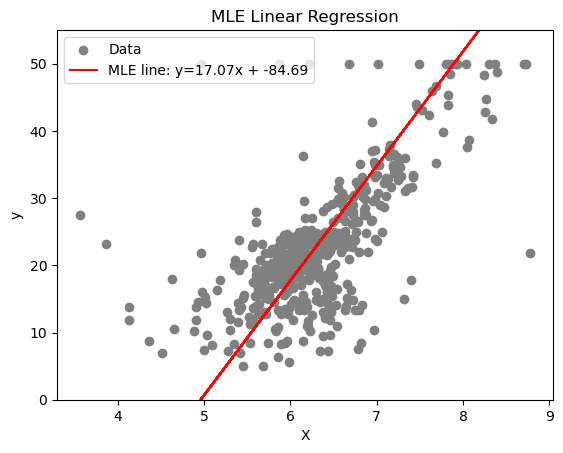

In [37]:
# Since there is no exact analytical solution to this problem,
# you need to define the loss for this problem in `mle_loss(),
# and then use scipy.optimize.minimize to optimize the parameters of the line.
# What you need to do is compute the loss returned by `mle_loss().

from scipy.optimize import minimize

y = y_data
X = x_data[:, 5]
X = np.vstack([np.ones(len(X)), X]).T
W = np.zeros((X.shape[-1], 1))
print(X.shape)

# Define the Maximum Likelihood Estimation (MLE) loss function
# based on the perpendicular distance from points to the regression line
def mle_loss(W, X, y):
    loss = 0.0

    # Hint: First, calculate the distance from each point to the line,
    #  and then compute the negative log-likelihood of the data.
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    pass
    distances = get_distance(X, y, W)
    sigma=np.std(distances)#求方差
    # Compute the negative log-likelihood
    loss=len(distances)/2*np.log(2*np.pi*sigma**2)+np.sum(distances**2)/(2*sigma**2)
    
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss

# Optimize the parameters by minimizing the negative log-likelihood
# (which is equivalent to maximizing the likelihood)
result = minimize(mle_loss, W.ravel(), args=(X, y), method='L-BFGS-B')

# Retrieve the optimal parameters
W = result.x
print(f"y = {W[1]:.4f}*x + {W[0]:.4f}")

# Compute the predicted values using the optimized parameters
y_pred = W @ X.T

print(f"Final parameters: a={W[1]:.4f}, b={W[0]:.4f}")

# Visualize the data and the estimated regression line
# The correct line may appear slightly off, but it should generally have a bottom-left to top-right direction.
plt.scatter(X[:, 1], y, color='gray', label='Data')
plt.plot(X[:, 1], W @ X.T, color='red', label=f'MLE line: y={W[1]:.2f}x + {W[0]:.2f}')  # Regression line
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.ylim(y.min()-5, y.max()+5)
plt.title('MLE Linear Regression')
plt.show()

**Inline Question 2**

Why isn't the predicted line very accurate with this probability-based algorithm?
How do you think we can reduce the impact of outliers on this algorithm?
If I replace the distance with another distribution, such as a uniform distribution, can we still ensure stable results?

$\color{blue}{\textit Your Answer:}$ For the firat question, it is because MLE method is sensitive to the outliers. 

For the second question: We can use Student's t distribution for the distance, because it is heavy tail distribution.

For the last question: We wouldn't get stable results because:The likelihood would be constant within some bounds. There would be no clear maximum likelihood estimate. The optimization problem would become ill-posed

